## Creating immage from scratch

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [12]:
black = np.zeros([150,200,3],'uint8')
white = 255*(black+1)
ones = np.ones([300,300,3],'uint8')
color_g,color_r,color_b = ones.copy(),ones.copy(),ones.copy()
color_g[:,:] = (0,255,0)
color_b[:,:] = (0,0,255)
color_r[:,:] = (255,0,0)
images = [black,white,color_g,color_r,color_b]

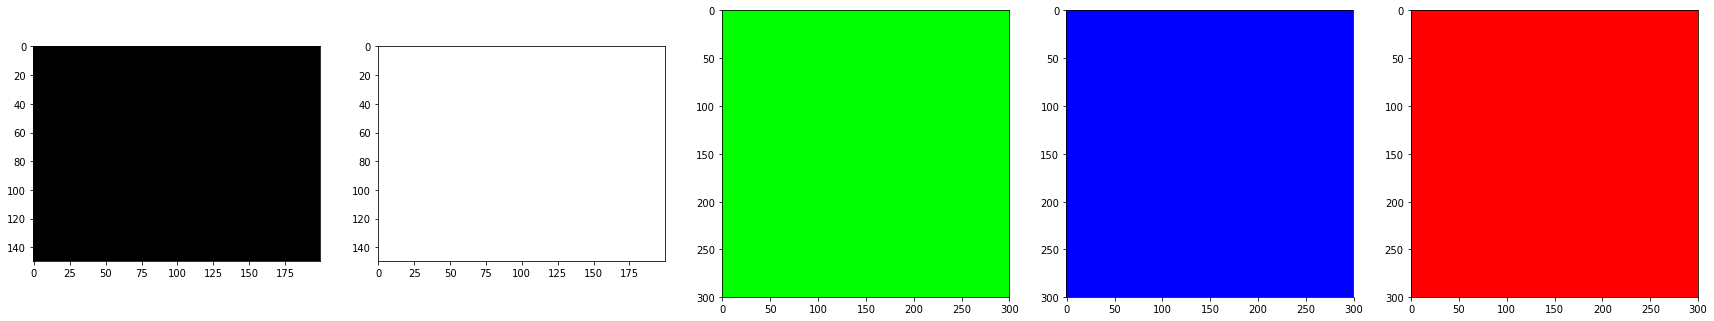

In [16]:
fig = plt.figure(figsize = (36, 32)) 
for i in range(len(images)):
    ax = fig.add_subplot(1, 6, i +1)
    ax.imshow(images[i],cmap = 'gray')

## Translation

In [66]:
img = cv2.imread("assets/ayu.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [67]:
rows,cols,h = img.shape
M = np.float32([[1,0,-50],[0,1,-50]])
img = cv2.warpAffine(img,M,(cols,rows))

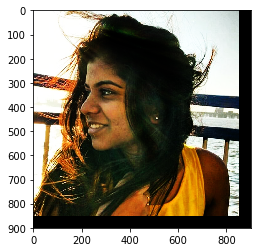

In [68]:
plt.imshow(img)

In [69]:
img = cv2.imread("assets/ayu.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
M = cv2.getRotationMatrix2D((cols/2,rows/2),70,1)
img = cv2.warpAffine(img,M,(cols,rows))

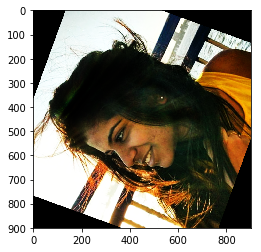

In [70]:
plt.imshow(img)

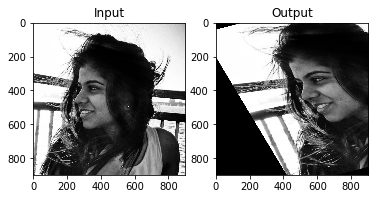

In [47]:
img = cv2.imread("assets/ayu.png",0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

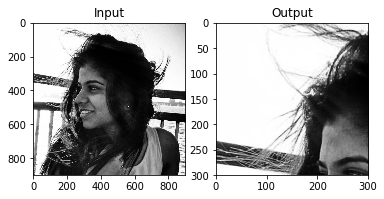

In [50]:
img = cv2.imread("assets/ayu.png",0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Image Thresholding

In [86]:
img = cv2.imread("assets/ayu.png",0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
img = cv2.medianBlur(img,7)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret2,th4 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)

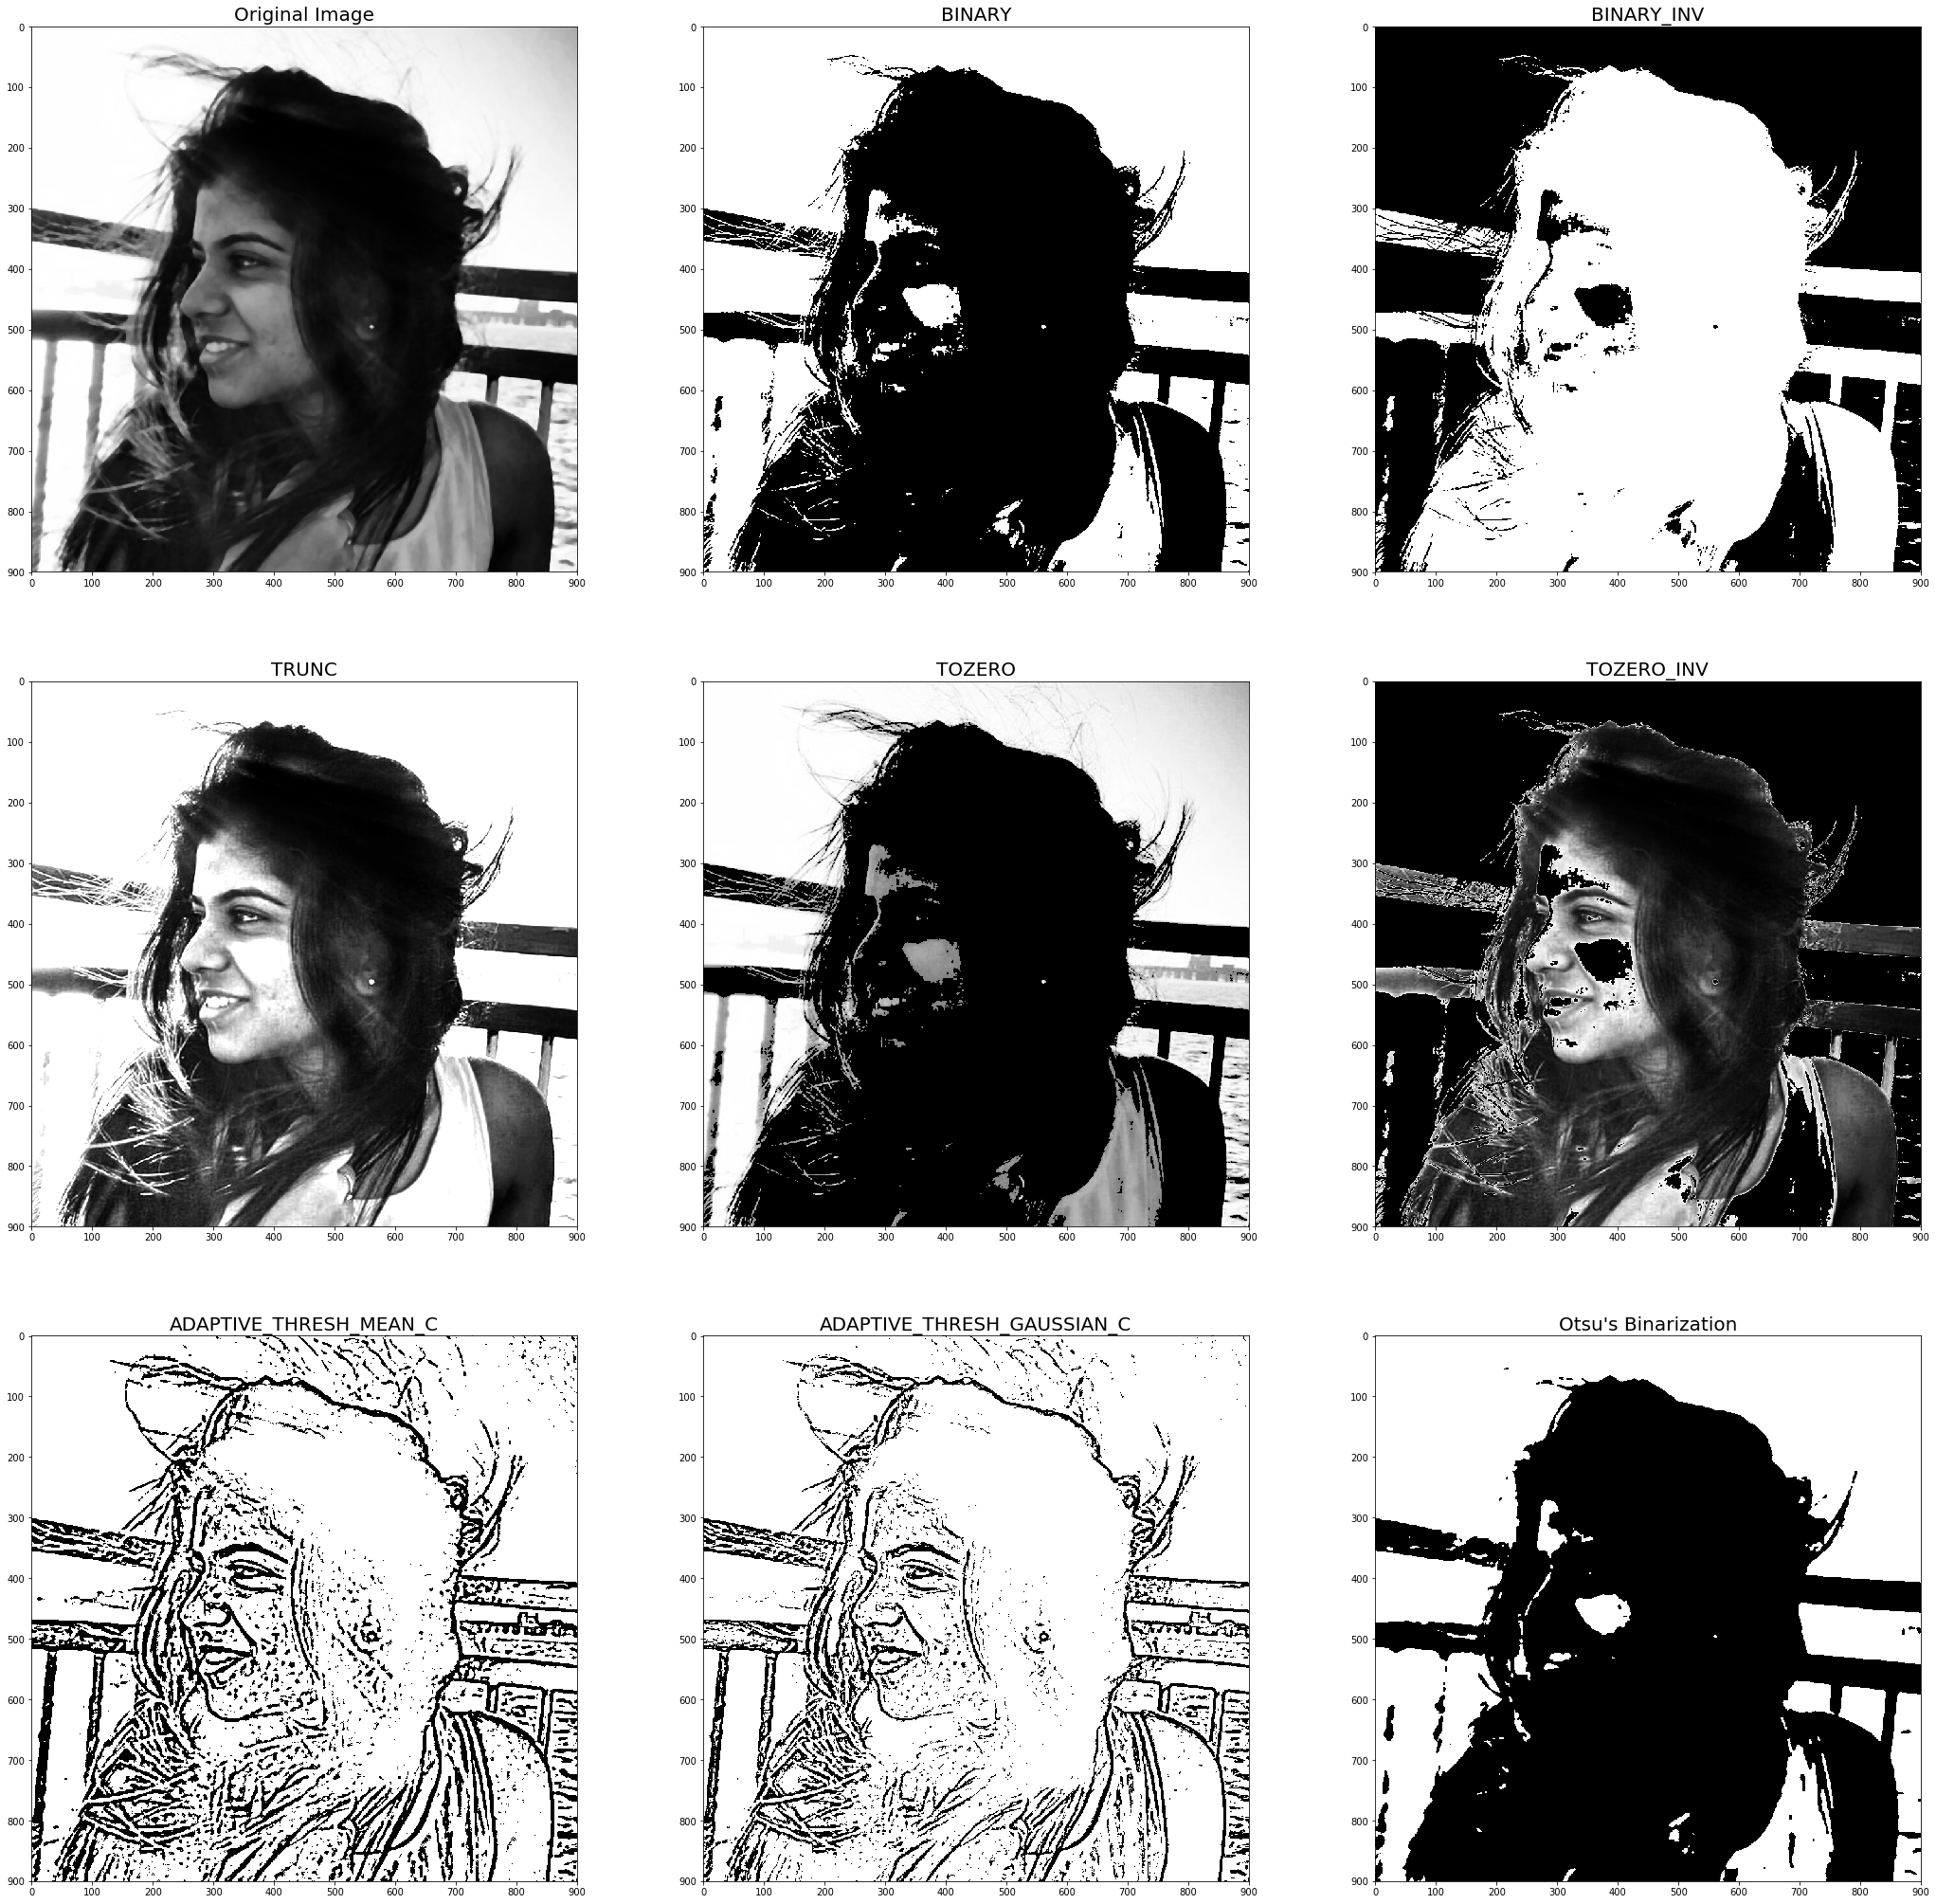

In [88]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','ADAPTIVE_THRESH_MEAN_C','ADAPTIVE_THRESH_GAUSSIAN_C','Otsu\'s Binarization']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5,th2,th3,th4]

fig = plt.figure(figsize = (36, 36)) 
for i in range(len(images)):
    ax = fig.add_subplot(3, 3, i +1)
    ax.imshow(images[i],cmap = 'gray')
    ax.set_title(titles[i],fontsize=20)

plt.show()